<h1> Laboratorio 3 </h1>

<ul>
    <li>Manuel Sosa - 201815393 </li>
    <li>Juan David Diaz  - 201729408 </li>
    <li>Simón Rendón  - 201820112 </li>
</ul>

In [1]:
seed = 161
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Composicion de pipelines
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler

# Regresion lineal
from sklearn.linear_model import LinearRegression

# Importar/ Exportar modelos
from joblib import dump, load

# Metricas
from sklearn.metrics import mean_squared_error as mse

# q-q plots
import scipy.stats as stats

from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_percentage_error

<h2> Carga de datos </h2>

In [2]:
# Se cargan los datos. 
df_original = pd.read_csv('datoslab3_historico.csv')
df_salud = df_original.copy()
print(df_salud.shape)
df_salud.head(5)

(2644, 20)


,Unnamed: 0,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 10-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,0,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,1,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,2,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,3,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,4,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [3]:
df_recent = pd.read_csv('datoslab3_recientes.csv')
print(df_recent.shape)
df_recent.head(5)

(294, 19)


,Unnamed: 0,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 10-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,2644,151.0,0,1.80,423.295351,9.0,0,68.6,0,91.0,4.87,9.0,0.1,2284.378580,146.0,0.1,0.1,0.693,14.6
1,2645,153.0,0,1.79,45.851058,85.0,0,67.8,0,91.0,5.90,9.0,0.1,229.714718,99789.0,0.1,0.1,0.683,13.7
2,2646,155.0,0,1.51,310.820338,88.0,0,67.0,0,85.0,5.30,84.0,0.1,1842.444210,99184.0,0.1,0.1,0.679,13.5
3,2647,157.0,0,1.35,330.100739,91.0,4,66.2,0,91.0,5.66,89.0,0.1,1837.977391,98611.0,0.1,0.1,0.674,13.2
4,2648,158.0,0,1.24,40.491289,93.0,0,65.5,0,91.0,4.75,91.0,0.1,263.272360,9882.0,0.1,0.1,0.676,13.7


<h2> 1. Perfilamiento de los datos </h2>

In [4]:
df_salud.dtypes

Unnamed: 0                           int64
Life expectancy                    float64
Adult Mortality                    float64
infant deaths                        int64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
Measles                              int64
BMI                                float64
under-five deaths                    int64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
HIV/AIDS                           float64
GDP                                float64
Population                         float64
thinness  10-19 years              float64
thinness 5-9 years                 float64
Income composition of resources    float64
Schooling                          float64
dtype: object

In [5]:
df_salud.describe()

,Unnamed: 0,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 10-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2644.00000,2644.000000,2644.000000,2644.00000,2644.000000,2644.000000,2644.000000,2644.000000,2644.000000,2644.000000,2644.000000,2644.000000,2644.000000,2644.000000,2644.000000,2.644000e+03,2644.000000,2644.000000,2644.000000,2644.000000
mean,1321.50000,69.068797,162.465204,31.14410,4.328684,792.465552,65.532905,2432.922844,37.662746,43.160363,81.967095,5.431078,81.926626,1.617095,6726.080237,1.052152e+07,4.743911,4.778215,0.602879,11.482678
std,763.40138,10.351757,121.186953,123.93232,4.146851,2077.768681,39.221347,11868.652439,20.339750,168.485929,24.521529,2.821982,24.502772,4.822150,13873.881462,5.680977e+07,4.467839,4.553418,0.244040,4.170684
min,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,660.75000,62.975000,73.000000,0.00000,0.407500,7.044565,14.750000,0.000000,18.900000,0.000000,78.000000,3.677500,78.000000,0.100000,238.626882,1.285900e+04,1.500000,1.500000,0.473000,9.500000
50%,1321.50000,72.100000,143.000000,2.00000,3.225000,70.648787,87.000000,14.000000,43.000000,3.000000,93.000000,5.550000,93.000000,0.100000,1254.652810,6.227965e+05,3.200000,3.200000,0.668000,12.300000
75%,1982.25000,75.800000,226.250000,18.00000,7.495000,485.959559,96.000000,329.750000,55.900000,23.000000,97.000000,7.372500,97.000000,0.800000,5277.746332,5.194999e+06,7.200000,7.300000,0.781000,14.200000
max,2643.00000,89.000000,699.000000,1800.00000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.240000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [6]:
df_salud.isnull().sum()

Unnamed: 0                         0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
BMI                                0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
thinness  10-19 years              0
thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
dtype: int64

In [7]:
df_salud.duplicated().sum()

0

<h2>2. Identificación de variables a utilizar </h2>

<p>Se realizará un estudio gráfico de las relaciones de cada posible variable dependiente frente a la independiente. Lo anterior con el fin de notar los buenos candidatos a estudiar dada su linealidad</p>

In [8]:
drop_columnas = ['Unnamed: 0']
df_salud = df_salud.drop(drop_columnas, axis=1)

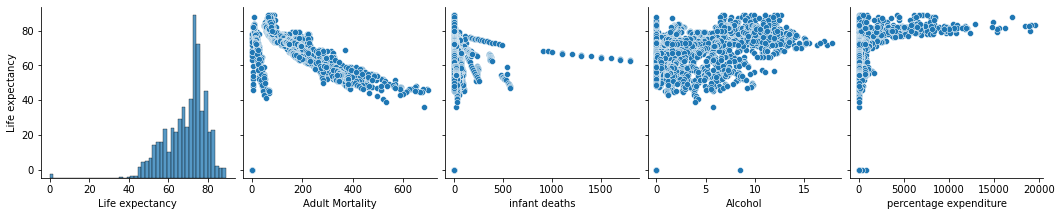

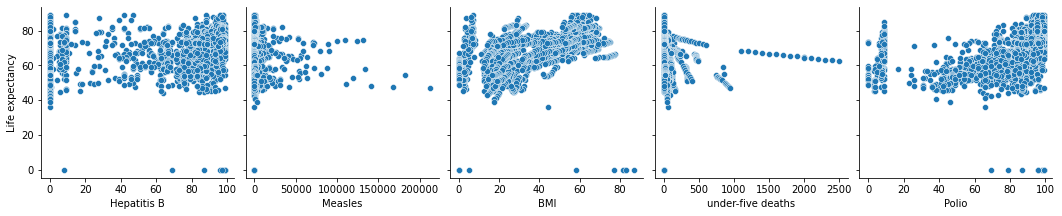

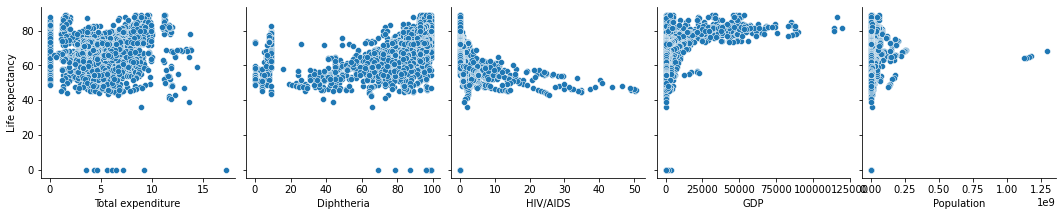

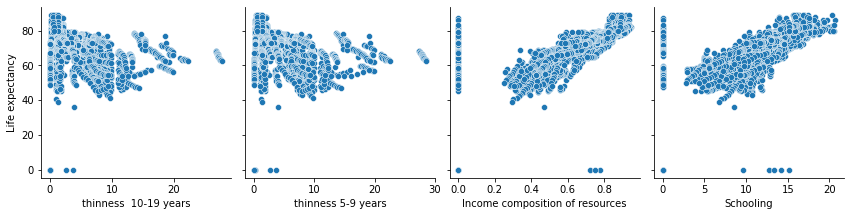

In [9]:
sns.pairplot(df_salud, height=3, y_vars = 'Life expectancy', x_vars = df_salud.columns[0:5], kind='scatter')
sns.pairplot(df_salud, height=3, y_vars = 'Life expectancy', x_vars = df_salud.columns[5:10], kind='scatter')
sns.pairplot(df_salud, height=3, y_vars = 'Life expectancy', x_vars = df_salud.columns[10:15], kind='scatter')
sns.pairplot(df_salud, height=3, y_vars = 'Life expectancy', x_vars = df_salud.columns[15:], kind='scatter')

De las graficas anteriores vemos que unos buenos candidatos, debido a su aparente alta relación lineal, son:
* Adult Mortality
* Income composition of resources
* Schooling

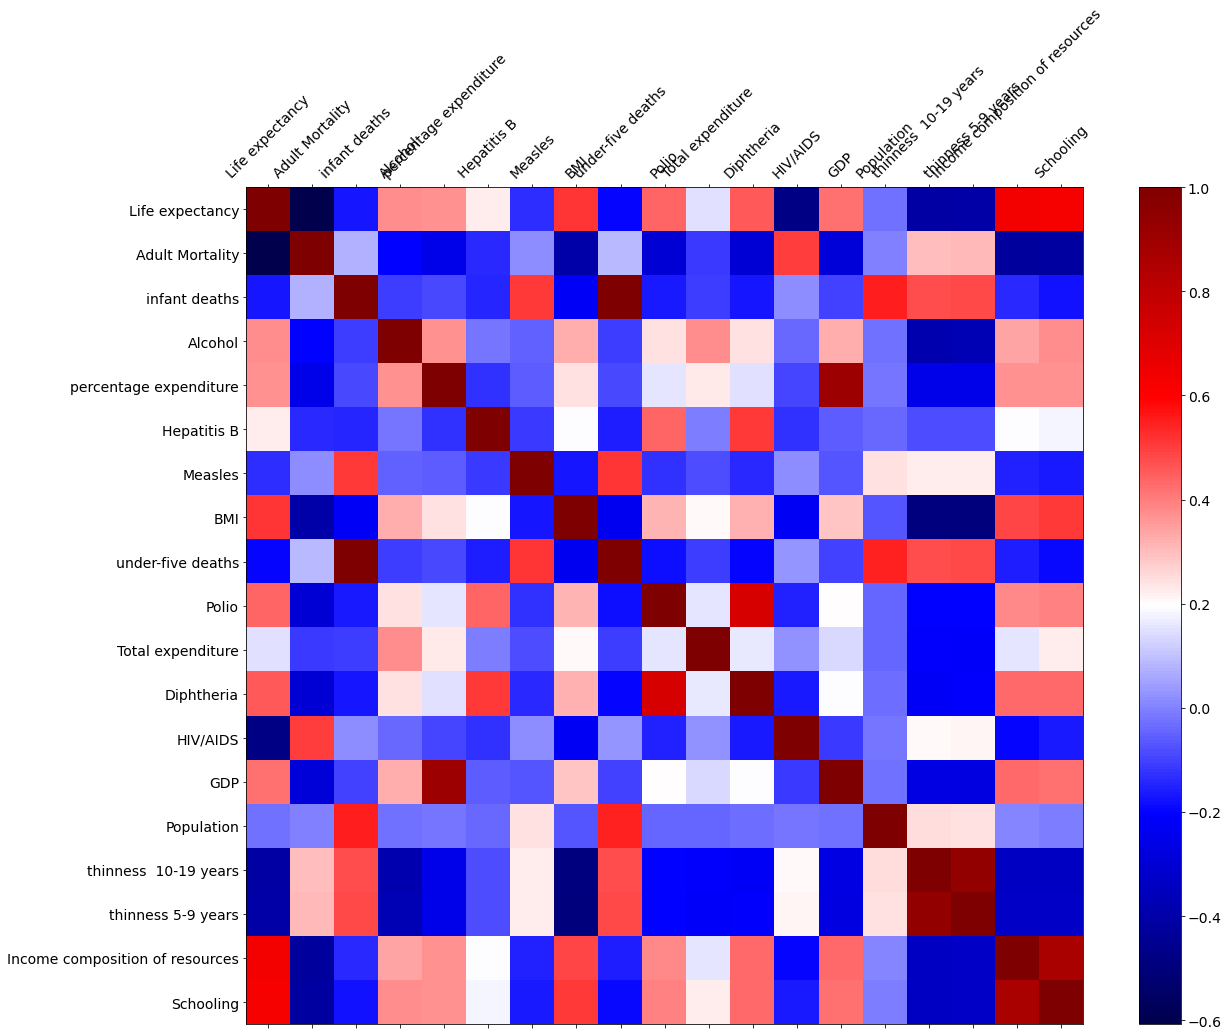

In [10]:
f = plt.figure(figsize=(20, 15))
plt.matshow(df_salud.corr(), fignum=f.number, cmap = 'seismic')
plt.xticks(range(df_salud.select_dtypes(['number']).shape[1]), df_salud.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(df_salud.select_dtypes(['number']).shape[1]), df_salud.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
_ = cb.ax.tick_params(labelsize=14)

<p>Se usa esta gráfica para confirmar una segunda vez el carácter lineal de las relaciones entre las variables escogidas. Se confirma que son las mejores candidatas.</p>

<h2>3. Preparación </h2>

In [11]:
df_salud["Adult Mortality"].value_counts().to_frame()

,Adult Mortality
12.0,28
14.0,26
16.0,25
11.0,22
144.0,22
...,...
372.0,1
363.0,1
593.0,1
342.0,1


In [12]:
atributo="Adult Mortality"
df_salud = df_salud[df_salud[atributo] >= 138]
df_salud[atributo].value_counts().to_frame()

,Adult Mortality
144.0,22
138.0,22
165.0,18
189.0,17
161.0,17
...,...
593.0,1
342.0,1
311.0,1
326.0,1


<p>Se eliminan los valores atípicos de la variable objetivo para garantizar un mejor desempeño. Se borran puesto que solo representan 3 valores del total.</p>

In [13]:
atributo="Life expectancy"
df_salud = df_salud[df_salud[atributo] >= 39]
df_salud[atributo].value_counts().to_frame()

,Life expectancy
73.0,23
75.0,16
68.0,16
72.0,15
69.0,13
...,...
44.8,1
45.5,1
49.3,1
47.9,1


<p> Se eliminan valores atípicos de la variable Income composition of resources que corresponden a 0.0 </p>

In [14]:
atributo="Income composition of resources"
df_salud = df_salud[df_salud[atributo] != 0.0]
df_salud[atributo].value_counts().to_frame()

,Income composition of resources
0.700,9
0.636,8
0.692,8
0.677,8
0.686,8
...,...
0.335,1
0.386,1
0.334,1
0.480,1


<p> Se eliminan valores atípicos de la variable Income composition of resources que corresponden a 0.0 </p>

In [15]:
atributo="Schooling"
df_salud = df_salud[df_salud[atributo] != 0.0]
df_salud[atributo].value_counts().to_frame()

,Schooling
12.9,27
11.1,25
11.7,25
11.4,24
12.5,24
...,...
16.8,1
15.1,1
6.0,1
3.3,1


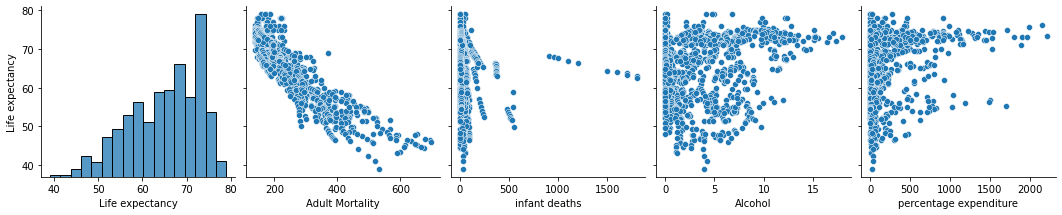

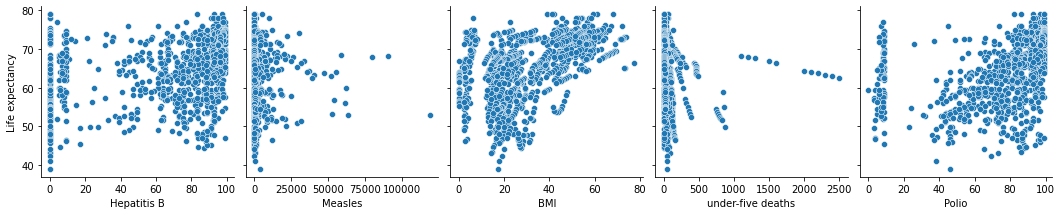

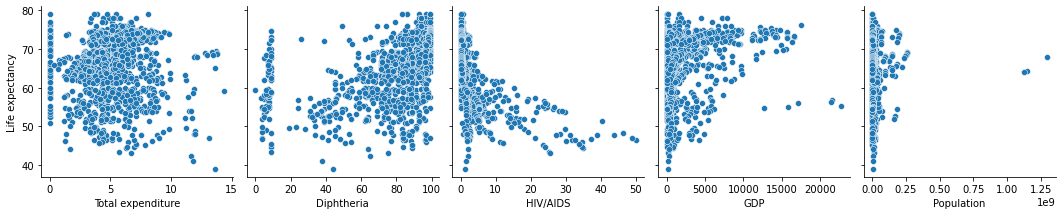

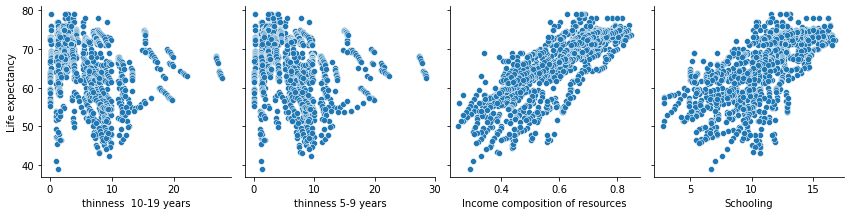

In [16]:
sns.pairplot(df_salud, height=3, y_vars = 'Life expectancy', x_vars = df_salud.columns[0:5], kind='scatter')
sns.pairplot(df_salud, height=3, y_vars = 'Life expectancy', x_vars = df_salud.columns[5:10], kind='scatter')
sns.pairplot(df_salud, height=3, y_vars = 'Life expectancy', x_vars = df_salud.columns[10:15], kind='scatter')
sns.pairplot(df_salud, height=3, y_vars = 'Life expectancy', x_vars = df_salud.columns[15:], kind='scatter')

<h2>4. Modelo </h2>

<p> Se seleccionan las cuatro variables las cuales poseen una relación lineal, de acuerdo a la etapa 3, y que fueron debidamente preparadas </p>

In [17]:
# Preprocesamiento
# Se usa un transformador para seleccionar unicamente las columnas que se quieren usar
selected_cols = ['Adult Mortality','Income composition of resources', 'Schooling']

pre = [('initial',ColumnTransformer([("selector", 'passthrough',selected_cols)])),('imputar', SimpleImputer(missing_values=np.nan, strategy='mean'))]


<p>"X" corresponde a las variables dependientes y "y" a la variable objetivo. Se separan para luego ser usadas en el modelo correctamente</p>

In [18]:
# Extraemos las variables explicativas y objetivo para entrenar
df_salud_c = df_salud[selected_cols]
X = df_salud_c
y = df_salud['Life expectancy']

<p> <b>Nota: Este paso hace parte de la preparación, pero por mayor fluidez en la comprensión del modelo se realizó en la etapa de modelamiento <b>. </p>
    <br>
    <p>Se normaliza con MinMaxScaler para que todas las variables se encuentren en la misma escala y así los coeficientes resultantes sean dicientes.</p>

In [19]:
scaler = MinMaxScaler()
scaled = scaler.fit_transform(X,y)
scaled = pd.DataFrame(scaled)

scaled.columns = selected_cols
scaled.describe()

y.describe()
X = scaled

In [20]:
# Modelo
model = [('model', LinearRegression())]

In [21]:
# Decalra el pipeline
pipeline = Pipeline(pre+model)

In [22]:
pipeline = pipeline.fit(X,y)

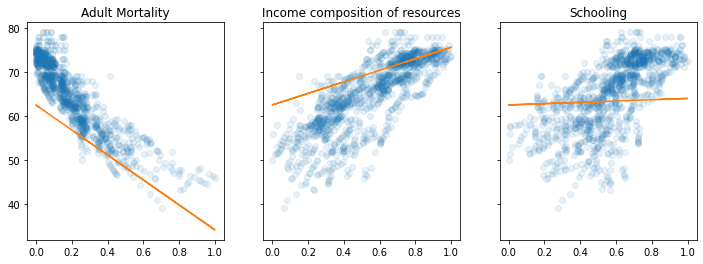

In [23]:
# Visualizamos la regresion lineal en cada dimension
f, axs = plt.subplots(1, len(selected_cols), sharey=True, figsize = (12,4))

for i in range(len(selected_cols)):

    pos_col = i
    col = selected_cols[pos_col]

    # Variable x
    x = X[col]
    # Pendiente
    m = pipeline['model'].coef_[pos_col]
    # Interceto
    b = pipeline['model'].intercept_

    axs[i].plot(x, y, 'o', alpha = 0.1)
    axs[i].plot(x, x*m + b)
    axs[i].set_title(col)

In [24]:
# Vuelve a imprimir los coeficientes
pd.DataFrame({'columns':selected_cols, 'coef':pipeline['model'].coef_})

,columns,coef
0,Adult Mortality,-28.375146
1,Income composition of resources,13.115616
2,Schooling,1.485354


In [25]:
### Root-Mean-Square Error (RMSE) 
pipeline.score(X,y)

0.9101702179254688

In [26]:
y_true = y
y_predicted = pipeline.predict(X)


np.sqrt(mse(y_true, y_predicted))

2.385855422886485

<h2>5. Evaluación Cuantitativa</h2>

<p> Se encontró que las tres variables con buena linealidad inicial se relacionan con la variable objetivo de la siguiente forma: </p>
<p>Adult Mortality posee una relación <b>inversamente proporcional</b> con la expectativa de vida: -28.3756146 </p> 
<p>Income composition of resources posee una relación <b>proporcional</b> con la expectativa de vida: 13.115616 </p>
<p>Schooling posee una relación <b>proporcional</b> con la expectativa de vida: 1.485354 </p>

<p>De acuerdo a las gráficas del modelo encontradas dos de las tres variables logran establecer una regresión con resultados que tienden a ser lineales (Adult Mortality, Income composition of resources). A pesar de que la tercera gráfica no es tan lineal como las otras, aun así se considera como aceptable (Schooling). </p>

<p>Encontramos que <b>las tres variables escogidas logran explicar la variable objetivo en un 91%</b>, como lo desmuestra el R^2 en la línea 300. Esto nos quiere decir que estas tres variables son muy acertadas a la hora de ser computadas en una función para estimar la expectativa de vida. </p>

<p>Se halló que <b>la raiz del error cuadrático medio es 2.38585</b>. Esto quiere decir que los puntos residuales se distribuyen al rededor de la línea estimada por la regresión en esa proporción. Lo ideal es que sea lo más cercano a a cero posible. El valor obtenido no es muy alto, pero al mismo tiempo da lugar para un margen de error. </p>

<p> <b>Hasta este punto del estudio, los resultados del modelo en función de las gráficas y las métricas arrojan buenos resultados. Por lo cual, hasta este punto, se recomienda al negocio usar instalar un modelo de estimación. Es necesario aclarar que aun falta el proceso de validación de supuestos que se realizará en la siguiente etapa. Esto puede cambiar la decisión en el caso en que no se cumplan los supuestos.</b> </p>

<p>Dado el caso en que los supuestos no se cumplan, <b>se propondría usar un modelo de regresión no lineal</b> que permitirá explicar mejor la expectativa de vida en función de otras variables que puedan ser mejor modeladas.</p>

<h2>6. Evaluación Cualitativa</h2>

### 6.1 Colinealidad
Realizamos la matriz de correlación para verificar

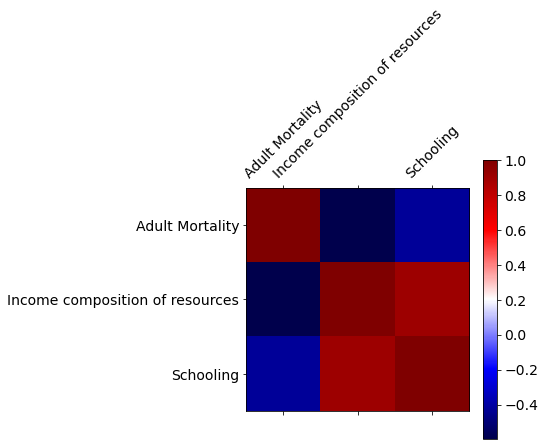

In [27]:

f = plt.figure(figsize=(5, 5))
plt.matshow(df_salud_c.corr(), fignum=f.number, cmap = 'seismic')
plt.xticks(range(df_salud_c.select_dtypes(['number']).shape[1]), df_salud_c.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(df_salud_c.select_dtypes(['number']).shape[1]), df_salud_c.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
_ = cb.ax.tick_params(labelsize=14)

Como podemos ver, las variables escogidas son altamente colineales por lo que tenremos que usar las dos menos colineales entre si, Adult Mortality y Schooling

In [28]:
selected_cols = ['Adult Mortality','Schooling']


pre = [('initial',ColumnTransformer([("selector", 'passthrough',selected_cols)])),('imputar', SimpleImputer(missing_values=np.nan, strategy='mean')),('scaler', MinMaxScaler()) ]
model = [('model', LinearRegression())]
pipeline = Pipeline(pre+model)
X2 = X[selected_cols]
pipeline.fit(X2,y)


Pipeline(steps=[('initial',
                 ColumnTransformer(transformers=[('selector', 'passthrough',
                                                  ['Adult Mortality',
                                                   'Schooling'])])),
                ('imputar', SimpleImputer()), ('scaler', MinMaxScaler()),
                ('model', LinearRegression())])

In [29]:
pipeline.score(X2,y)

0.8915368455493603

In [30]:
y_true = y
y_predicted = pipeline.predict(X2)
np.sqrt(mse(y_true, y_predicted))

2.621652137255427

In [31]:

scaled = scaler.fit_transform(df_recent[selected_cols])

scaled = pd.DataFrame(scaled)

scaled.columns = selected_cols

df_recent_s = scaled
df_recent_s.describe()

,Adult Mortality,Schooling
count,294.000000,294.000000
mean,0.249179,0.632566
std,0.207427,0.307514
min,0.000000,0.000000
25%,0.113416,0.619427
50%,0.211618,0.707006
75%,0.319502,0.826433
max,1.000000,1.000000


<AxesSubplot:xlabel='Life expectancy', ylabel='Count'>

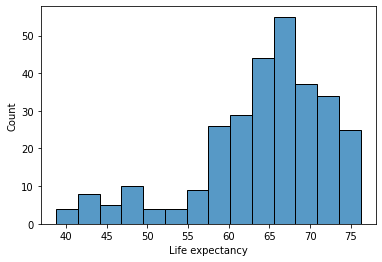

In [32]:
df_recent['Life expectancy'] = pipeline.predict(df_recent_s[selected_cols])
sns.histplot(df_recent['Life expectancy'])

No podemos afirmar que este supuesto se cumpla, pero en nuestra experimentación (Intentamos con diferentes variables y casi todas eran colineales) esto es lo maximo que nos hemos podido acercar

### 6.2 Linealidad

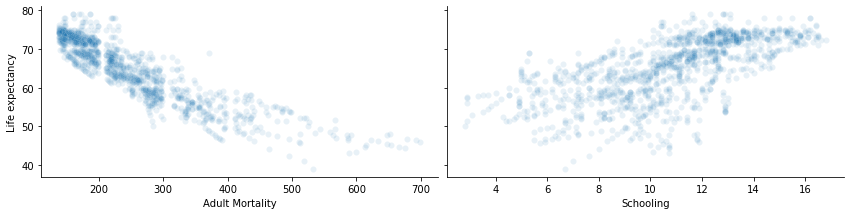

In [33]:
sns.pairplot(df_salud, height=3, aspect = 2, y_vars = 'Life expectancy', x_vars = ['Adult Mortality','Schooling'], kind='scatter', plot_kws = {'alpha':0.1})

Revisemos si la relacion Life expectancy vs Schooling no es lineal

In [34]:
# Revisamos

# Creamos la variable
X = df_salud[['Schooling']].copy()
X['schooling_2'] = X['Schooling']**2

# columna
col = 'schooling_2'

pre = [('initial',ColumnTransformer([("selector", 'passthrough',[col])])),
       ('imputer', SimpleImputer(missing_values=np.nan, strategy='median')),
       ('scaler', MinMaxScaler())]

model = [('model', LinearRegression())]

p_temp = Pipeline(pre+model)

p_temp = p_temp.fit(X,y)

print(f"{col}: {p_temp.score(X,y)}")

schooling_2: 0.43768740518647664


Puede que sea un polinomio de grado 2 la relación


### 6.3 Normalidad en los errores

### 6.3 Normalidad en los errires

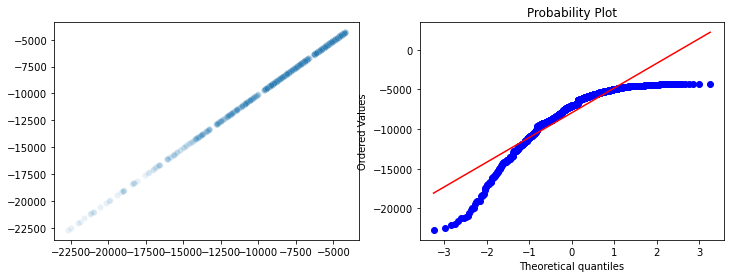

In [35]:
X = df_salud_c[selected_cols]
y = df_salud['Life expectancy']

# Calculamos los errores
errors = (pipeline.predict(X) - y).values

fig, axes = plt.subplots(1, 2, figsize = (12,4))

# Dispersión
sns.scatterplot(x = pipeline.predict(X), y = errors, alpha = 0.1, ax = axes[0])

# q-q plot
_ = stats.probplot(errors, dist="norm", plot=axes[1])

Buscaremos los outliers en la variable objetivo para eliminarlos

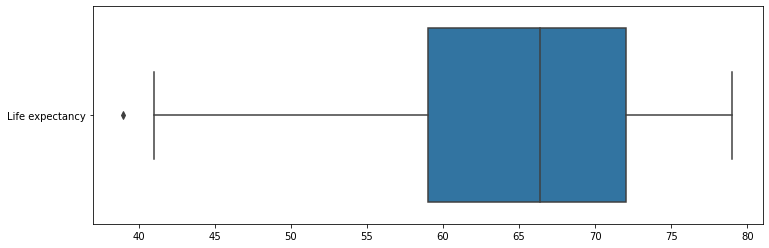

In [36]:
# Diagrama de caja
fig=plt.figure(figsize=(12,4))
ax = sns.boxplot(data= df_salud[['Life expectancy']], orient="h")

In [37]:
dfS=df_salud
drop = df_salud[df_salud['Life expectancy']<=41].index
dfS= dfS.drop(drop)

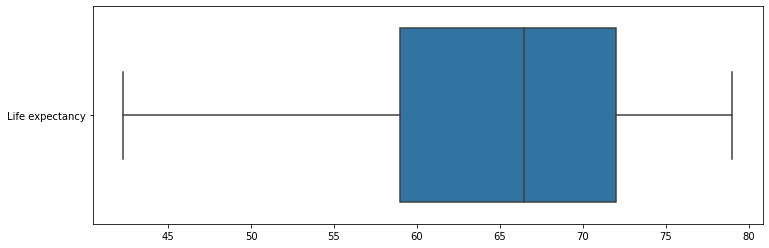

In [38]:
fig=plt.figure(figsize=(12,4))
ax = sns.boxplot(data= dfS[['Life expectancy']], orient="h")

In [39]:
# Revisamos
col = ['Adult Mortality','Schooling']
# Creamos la variable
X = dfS[col]
y = dfS['Life expectancy']

# columna


pre = [('initial',ColumnTransformer([("selector", 'passthrough',col)])),
       ('imputer', SimpleImputer(missing_values=np.nan, strategy='median')),
       ('scaler', MinMaxScaler())]

model = [('model', LinearRegression())]

p3 = Pipeline(pre+model)

p3 = p3.fit(X,y)

print(f"{col}: {p3.score(X,y)}")

['Adult Mortality', 'Schooling']: 0.8904016326803191


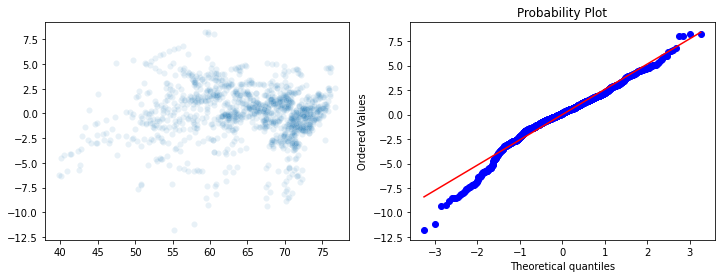

In [40]:
# Calculamos los errores
errors = (p3.predict(X) - y).values

fig, axes = plt.subplots(1, 2, figsize = (12,4))

# Dispersión
sns.scatterplot(x = p3.predict(X), y = errors, alpha = 0.1, ax = axes[0])

# q-q plot
_ = stats.probplot(errors, dist="norm", plot=axes[1])

Podemos ver que el Q-Q plot mejoró y se ve al menos decente pero no es perfecto

### 6.4 Varianza constante

### 6.4 Varianza Constante

<AxesSubplot:xlabel='Life expectancy'>

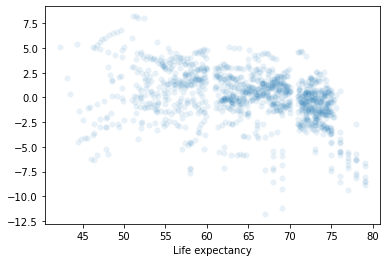

In [41]:
sns.scatterplot(data  = dfS, x = 'Life expectancy', y = errors, alpha = 0.1)

Intentaremos usar una relación polinómica para construir un nuevo modelo

In [42]:
# TODO
poly = PolynomialFeatures()
df_poly = poly.fit_transform(dfS[col])
df_poly = pd.DataFrame(df_poly)

df_poly.columns = ['1','Schooling','Adult Mortality','Schooling1','Schooling-Adult','Adult2']
df_poly.describe()

,1,Schooling,Adult Mortality,Schooling1,Schooling-Adult,Adult2
count,1230.0,1230.000000,1230.000000,1230.000000,1230.000000,1230.000000
mean,1.0,246.186992,10.791138,70908.239024,2537.378618,124.282919
std,0.0,101.531202,2.800112,67495.599833,1033.816241,58.312563
min,1.0,138.000000,2.800000,19044.000000,795.200000,7.840000
25%,1.0,168.000000,9.000000,28224.000000,1928.500000,81.000000
50%,1.0,219.000000,11.100000,47961.000000,2249.350000,123.210000
75%,1.0,287.000000,12.800000,82369.000000,2885.400000,163.840000
max,1.0,699.000000,16.800000,488601.000000,8318.100000,282.240000


In [43]:
X = df_poly.drop('1',axis=1)
y = dfS['Life expectancy']

# columna
col = ['Schooling','Adult Mortality','Schooling1','Schooling-Adult','Adult2']

pre = [('initial',ColumnTransformer([("selector", 'passthrough',col)])),
       ('imputer', SimpleImputer(missing_values=np.nan, strategy='median')),
       ('scaler', MinMaxScaler())]

model = [('model', LinearRegression())]

p4 = Pipeline(pre+model)

p4 = p4.fit(X,y)

print(f"{col}: {p4.score(X,y)}")

['Schooling', 'Adult Mortality', 'Schooling1', 'Schooling-Adult', 'Adult2']: 0.9028821170870779


<AxesSubplot:xlabel='Life expectancy'>

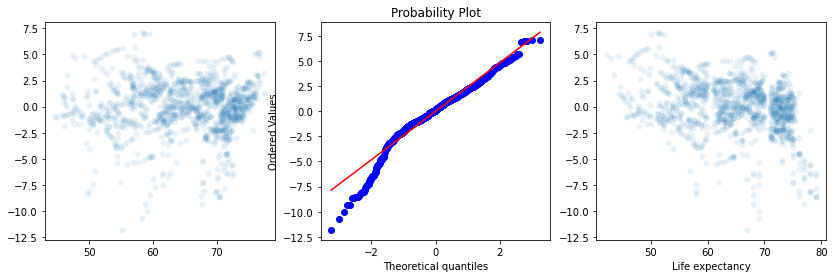

In [44]:
# Revisamos las graficas

# Calculamos los errores
errors = (p4.predict(X) - y).values

fig, axes = plt.subplots(1, 3, figsize = (14,4))

# Dispersión
sns.scatterplot(x = p4.predict(X), y = errors, alpha = 0.1, ax = axes[0])

# q-q plot
_ = stats.probplot(errors, dist="norm", plot=axes[1])

sns.scatterplot(data  = dfS, x = 'Life expectancy', y = errors, alpha = 0.1, ax = axes[2])

En este caso, la mejora es marginal por lo que usaremos el modelo lineal

### 6.5 Mejor modelo y análisis

### 6.5 Mejor modelo

In [45]:
# Revisamos
col = ['Adult Mortality','Schooling']
# Creamos la variable
X = dfS[col]
y = dfS['Life expectancy']

# columna


pre = [('initial',ColumnTransformer([("selector", 'passthrough',['Adult Mortality','Schooling'])])),
       ('imputer', SimpleImputer(missing_values=np.nan, strategy='median')),
       ('scaler', MinMaxScaler())]

model = [('model', LinearRegression())]

p3 = Pipeline(pre+model)

p3 = p3.fit(X,y)

print(f"{col}: {p3.score(X,y)}")

['Adult Mortality', 'Schooling']: 0.8904016326803191


In [46]:
# Revisamos
col = ['Adult Mortality','Schooling']
# Creamos la variable
X = df_original
y = df_original['Life expectancy']

# columna


pre = [('initial',ColumnTransformer([("selector", 'passthrough',['Adult Mortality','Schooling'])])),
       ('imputer', SimpleImputer(missing_values=np.nan, strategy='median')),
       ('scaler', MinMaxScaler())]

model = [('model', LinearRegression())]

p3 = Pipeline(pre+model)

p3 = p3.fit(X,y)

print(f"{col}: {p3.score(X,y)}")

['Adult Mortality', 'Schooling']: 0.534049872179344


<AxesSubplot:xlabel='Life expectancy', ylabel='Count'>

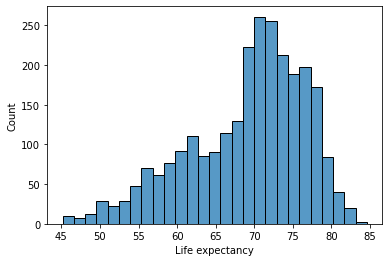

In [47]:
dfR = df_original
dfR['Life expectancy'] = p3.predict(df_original)
sns.histplot(dfR['Life expectancy'])

In [48]:
aux = ['Adult Mortality','Schooling','Life expectancy']
dfR[aux].describe()

,Adult Mortality,Schooling,Life expectancy
count,2644.000000,2644.000000,2644.000000
mean,162.465204,11.482678,69.068797
std,121.186953,4.170684,7.564931
min,0.000000,0.000000,45.144599
25%,73.000000,9.500000,64.359945
50%,143.000000,12.300000,70.623600
75%,226.250000,14.200000,74.614473
max,699.000000,20.700000,84.596277


In [49]:
p3.score(X,y)

0.534049872179344

Podemos ver que en este caso el R2 es de 89% lo cual significa que el modelo es bastante confiable, aún cuando los supuestos no se cumplen a gran cabalidad

In [54]:
y_true = y
y_predicted = p3.predict(X)

np.sqrt(mse(y_true, y_predicted))
y_predicted

array([63.9127444 , 63.51357318, 63.51077257, ..., 73.00836052,
       73.04719481, 77.839676  ])

Podemos ver que en este caso los coeficientes son -32,6 para Adult Mortality y 13,5 para Schooling.
Esto significa que Adult Mortality es más importante que el Schooling a la hora de realizar la regresión de la expectativa de vida. Además, Adult Mortality es inversamente proporcional a la expectativa de vida mientras que el Schooling es directamente proporcional.

In [51]:
pd.DataFrame({'columns':col, 'coef':p3['model'].coef_})

,columns,coef
0,Adult Mortality,-25.187551
1,Schooling,22.956648


Podemos ver que en este caso los coeficientes son -32,6 para Adult Mortality y 13,5 para Schooling.
Esto significa que Adult Mortality es más importante que el Schooling a la hora de realizar la regresión de la expectativa de vida. Además, Adult Mortality es inversamente proporcional a la expectativa de vida mientras que el Schooling es directamente proporcional.

In [52]:
# Imprimimos el intercepto 
p3['model'].intercept_

62.18853577035616

Podemos ver que el intercepto es un valor relativamente alto, lo cual tiene sentido ya que al tener una variable directamente proporcional y una inversamente proporcional, el valor estimado va a fluctuar tanto hacia arriba como hacia abajo.

## 7. Exportación del modelo

## 7. Exportación del modelo

In [58]:
# Usamos la lbreria joblib
filename = 'modelo.joblib'
# Se guarda
dump(p3, filename) 

['modelo.joblib']

In [59]:
p3["model"].coef_
   

array([-25.18755148,  22.95664825])

In [60]:
modelN = load("./modelo.joblib")

In [61]:
modelN["model"].coef_


array([-25.18755148,  22.95664825])